In [ ]:
# Learning Practice 10 for the University of Tulsa's QM-7063 Data Mining Course
# Evaluating Predictive Performance
# Professor: Dr. Abdulrashid, Spring 2023
# Noah L. Schrick - 1492657

# Imports

In [54]:
import pandas as pd
from dmba import liftChart

# Problem 5.7 
Table 5.7 shows a small set of predictive model validation results for a classification
model, with both actual values and propensities.

| Propensity of 1 | Actual          |
|-----------------|-----------------|
| 0.03            | 0               |
| 0.52            | 0               |
| 0.38            | 0               |
| 0.82            | 1               |
| 0.33            | 0               |
| 0.42            | 0               |
| 0.55            | 1               |
| 0.59            | 0               |
| 0.09            | 0               |
| 0.21            | 0               |
| 0.43            | 0               |
| 0.04            | 0               |
| 0.08            | 0               |
| 0.13            | 0               |
| 0.01            | 0               |
| 0.79            | 1               |
| 0.42            | 0               |
| 0.29            | 0               |
| 0.08            | 0               |
| 0.02            | 0               |

# a.
Calculate error rates, sensitivity, and specificity using cutoffs of 0.25, 0.5, and 0.75.

In [46]:
data = [
        [0.03, 0],
        [0.52, 0],
        [0.38, 0], 
        [0.82, 1], 
        [0.33, 0], 
        [0.42, 0], 
        [0.55, 1], 
        [0.59, 0], 
        [0.09, 0], 
        [0.21, 0], 
        [0.43, 0], 
        [0.04, 0], 
        [0.08, 0], 
        [0.13, 0], 
        [0.01, 0], 
        [0.79, 1], 
        [0.42, 0], 
        [0.29, 0], 
        [0.08, 0],
        [0.02, 0]
        ]

table = pd.DataFrame(data)
for cutoff in [0.25, 0.5, 0.75]:
        TP = 0; TN = 0; FP = 0; FN = 0
        for row in table.iterrows():
                if (row[1][0] >= cutoff and row[1][1] == 1):
                        TP = TP + 1
                elif (row[1][0] < cutoff and row[1][1] == 0):
                        TN = TN + 1
                elif (row[1][1] >= cutoff and row[1][1] == 0):
                        FP = FP + 1
                else:
                        FN = FN + 1
                
                ER = round(1 - (TP+TN)/len(table.index), 3)
                if TP+FN == 0:
                        sens = 0
                else:
                        sens = round(TP/(TP+FN), 3)
                if TN+FP == 0:
                        spec = 0
                else:
                        spec = round(TN/(TN+FP),3)

        print("Cuttoff value of " + str(cutoff) + 
              " has error rate = " + str(ER) + "," + 
              " sensitivity = " + str(sens) +
              " and specificity = " + str(spec))


Cuttoff value of 0.25 has error rate = 0.4, sensitivity = 0.273 and specificity = 1.0
Cuttoff value of 0.5 has error rate = 0.1, sensitivity = 0.6 and specificity = 1.0
Cuttoff value of 0.75 has error rate = 0.05, sensitivity = 0.667 and specificity = 1.0


# b.
Create a decile lift chart.

<AxesSubplot: title={'center': 'Decile Lift Chart'}, xlabel='Percentile', ylabel='Lift'>

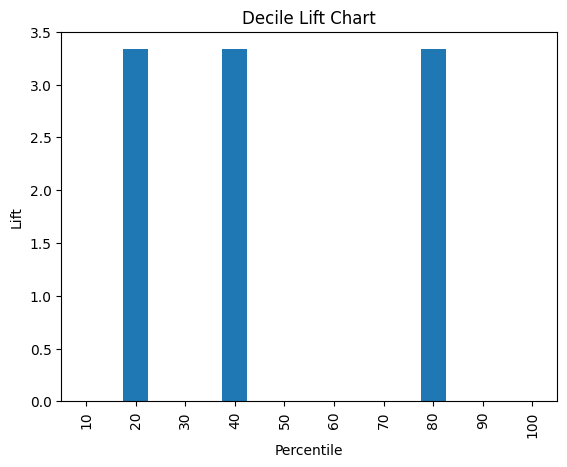

In [59]:
liftChart(table[1], labelBars=False)
